# Project Assignment - Image Classification Exploiting Sparsity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from math import isclose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation

In [ ]:
# reading data and converting to dataframe
data = pd.read_csv('Project_Data_EE4C12_CE_IMG.csv', header=None)
dataSet = pd.DataFrame(data)

In [4]:
dataSet

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8040,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8041,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
sorted_dataSet = dataSet.sort_values(by=dataSet.columns[0]).reset_index(drop=True)

In [19]:
sorted_dataSet

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8040,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8041,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# separating features and labels
Y_pd = sorted_dataSet[sorted_dataSet.columns[0]]
X_pd = sorted_dataSet.drop(sorted_dataSet.columns[0], axis=1)

In [21]:
# using numpy arrays instead of pandas dataframes
Y = Y_pd.to_numpy()
X = X_pd.to_numpy()

In [22]:
# function to display image from flattened array (784 -> 28x28)
def create_image(flatImage,imageSize=28):
    image = np.zeros((imageSize,imageSize))
    for i in range(imageSize):
        image[i] = flatImage[(i*imageSize):((i+1)*imageSize)]
    return image

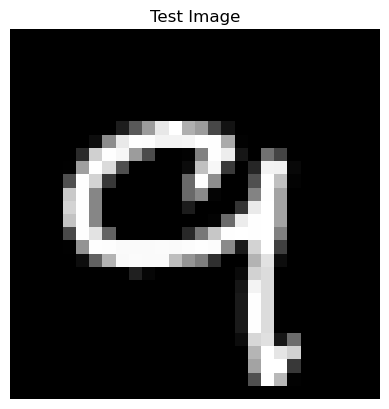

In [23]:
test_image =create_image(X[-1])
plt.imshow(test_image, cmap='gray')  # 'gray' ensures it's displayed in grayscale
plt.title("Test Image")
plt.axis('off')  # Hide axes for clarity
plt.show()

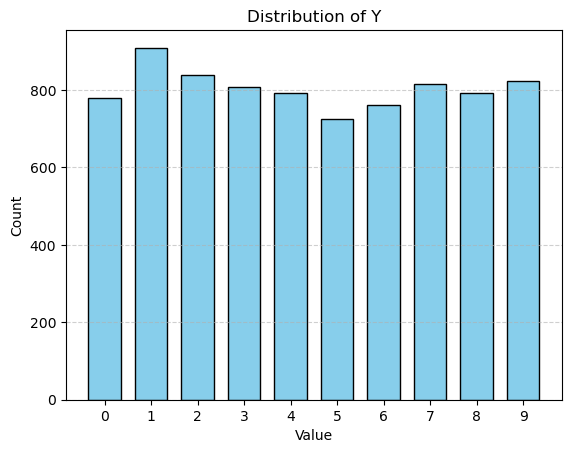

In [27]:
# plotting the amount of samples for each label:
unique, counts = np.unique(Y, return_counts=True)
bar_width = 0.7  # smaller value = more space between bars
plt.bar(unique, counts, width=bar_width, color='skyblue', edgecolor='black')
plt.title("Distribution of Y")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(unique)  # Show each integer on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.savefig("data_histogram.png")
plt.show()

In [24]:
# normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# showing normalization on first 10 features:
print("Mean of X", np.nanmean(X[:10,:],axis=1))
print("Mean of X after z-score normalization", np.nanmean(X_scaled[:10,:],axis=1))

Mean of X [32.11479592 45.13520408 63.35714286 31.09566327 45.63265306 67.79464286
 27.36352041 56.52295918 70.8622449  21.91071429]
Mean of X after z-score normalization [-0.05465564  0.07961507  0.39452265  0.05962684  0.12538456  0.40501804
 -0.0932695   0.39653849  0.36044899 -0.14775196]


In [26]:
# train-test split
Test_ratio = 0.2
random_seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=Test_ratio, random_state=random_seed, stratify=Y)

## Model Training